In [2]:
# Description: This program classifies clothes from the Fashion MNIST data set

#Import the libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load the data set
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Image Label: 5


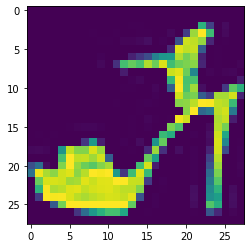

In [6]:
#View a training image
img_index = 9 # <<<<<  You can update this value to look at other images
img = train_images[img_index]
print("Image Label: " + str(train_labels[img_index]))
plt.imshow(img)

In [7]:
#Print the shape 
print(train_images.shape)# 60,000 rows of 28 x 28 pixel images
print(test_images.shape) # 10,000 rows of 28 x 28 pixel images

(60000, 28, 28)
(10000, 28, 28)


In [8]:
#Create the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
#Compile the model
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [11]:
#Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 116us/sample - loss: 3.1743 - accuracy: 0.6718
Epoch 2/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.7444 - accuracy: 0.7171
Epoch 3/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.6261 - accuracy: 0.7717
Epoch 4/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5567 - accuracy: 0.7982
Epoch 5/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5325 - accuracy: 0.8126


In [12]:
#Evaluate the model
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 79us/sample - loss: 0.5327 - accuracy: 0.8260


[0.5327043796539307, 0.826]

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


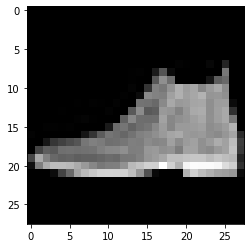

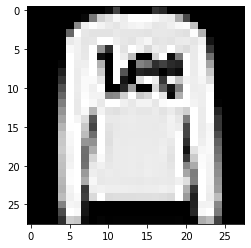

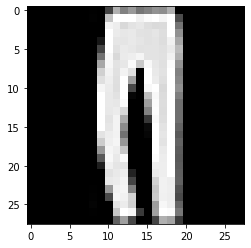

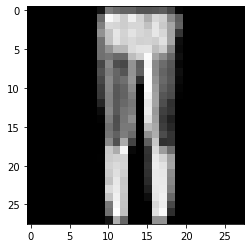

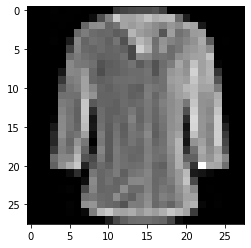

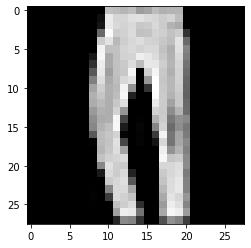

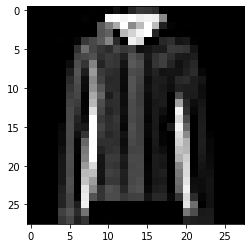

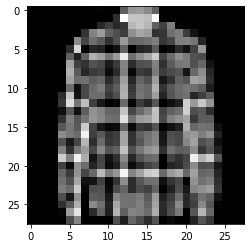

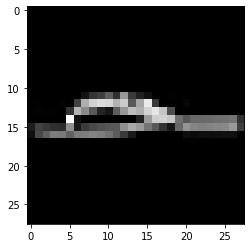

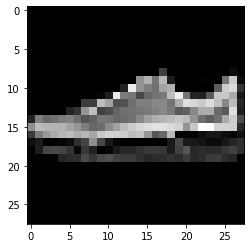

In [14]:
#Make a prediction
predictions = model.predict(test_images[:10])
#Print the predicted labels
print(np.argmax(predictions, axis=1))
#Print the actual labels
print(test_labels[:10])

for i in range(0,10):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show()